**Programming Assignment. Gradient boosting**

---

In [2]:
from sklearn import model_selection, datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In this task we will make an attempt to create gradient booting with our hands. We will work with the classic Boston dataset.

---

# Preprocessing of the data

## Import data

In [3]:
X, y = datasets.load_boston(return_X_y=True)

In [4]:
print(datasets.load_boston().DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [6]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
pd.DataFrame(y).head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Processing missing values

In [8]:
print('Any missing values in X:', pd.DataFrame(X).isna().any().any())
print('Any missing values in y:', pd.DataFrame(y).isna().any().any())

Any missing values in X: False
Any missing values in y: False


## Processing categorical features (passed)

There are categorical features in the dataset, but now we skip this step to follow the task.

## Split and Stratification of the dataset (passed)

In this step we will divide dataset to train and test split. Since the problem is a regression problem, stratification is not nessesary.

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, shuffle=False)

## Balancing classes (passed)

In the problem of regression balancing of the classes is not needed.

## Scaling values in train set

temp passed

---
# Models training (completing the tasks)

In this section we will do completing tasks according to the instructions of course assignment [here.](https://www.coursera.org/learn/supervised-learning/programming/SwnIU/gradiientnyi-bustingh-svoimi-rukami)

## Task 1. Get the bias vector

Bias vector for MSE is the following: $$\vec s = \left(-2(a_{N-1}(x_1)-y_1),..., -2(a_{N-1}(x_n)-y_n)\right)$$

## Task 2. Train algorithms composition

In [11]:
from sklearn import tree, metrics

In [12]:
def gbm_predict(X):
    """Function to make predictions on algorithms composition."""
    return np.array([sum([coeff * algo.predict([x])[0] for algo, coeff in 
                 zip(base_algorithms_list, coefficients_list)]) for x in X])

Creating the algorithm of gradient boosting

In [13]:
"""Initial lists and coef hyperparam"""
base_algorithms_list = []
coefficients_list = []
coeff = 0.9

"""Loop through decending iterations"""
train_set = y_train
for i in range(50):
    # Sequential tree generation and training onto bias vector.
    base_tree = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
    base_tree.fit(X_train, train_set)
    base_algorithms_list.append(base_tree)

    # For the sake of gbm_predict function we append coeff to coeffs list.
    coefficients_list.append(coeff)

    # To prepare for the next iter, we make predictions of the algo 
    # composition on the base learning sample.  Then, we update the
    # bias vector (train_set) according to new algo composition.
    train_set = -(gbm_predict(X_train) - y_train)

Evaluating the returned composition of algos. Metric is the root mean squared error.

In [14]:
RMSE = metrics.mean_squared_error(y_test, gbm_predict(X_test))**0.5
print('Task 2. Answer:', RMSE)

Task 2. Answer: 5.476650974168948


In [15]:
def write_answer(answer_no, answer):
    """Writes answer in file"""
    filename = 'answer' + str(answer_no) + '.txt'
    with open(filename, 'w') as fout:
        fout.write(str(answer))

write_answer(2, RMSE)

## Task 3. Decreasing coeffs

Same as Task 2, but decreasing coefs in every iteration.

In [16]:
"""Initial lists and coef hyperparam"""
base_algorithms_list = []
coefficients_list = []
coeff = 0.9

"""Loop through decending iterations"""
train_set = y_train
for i in range(50):
    # Sequential tree generation and training onto bias vector.
    base_tree = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
    base_tree.fit(X_train, train_set)
    base_algorithms_list.append(base_tree)

    # For the sake of gbm_predict function we append coeff to coeffs list.
    coefficients_list.append(coeff/(1+i))

    # To prepare for the next iter, we make predictions of the algo 
    # composition on the base learning sample.  Then, we update the
    # bias vector (train_set) according to new algo composition.
    train_set = -(gbm_predict(X_train) - y_train)

In [17]:
RMSE = metrics.mean_squared_error(y_test, gbm_predict(X_test))**0.5
print('Task 3. Answer:', RMSE)

write_answer(3, RMSE)

Task 3. Answer: 4.810893280258556


## Task 4. XGBoost

In this task, we will study whether the number of iterations and the depth of trees affect the overfitting of grad boosting.

In [18]:
import xgboost as xgb

In [19]:
"""Loop through max trees range"""
train_score_maxtrees = []
test_score_maxtrees = []
max_trees = np.arange(1,105, 5)
for n_trees in max_trees:
    regr = xgb.XGBRegressor(n_estimators=n_trees)
    regr.fit(X_train, y_train)
    
    train_score_maxtrees.append(metrics.mean_squared_error(
        y_train, regr.predict(X_train)))
    test_score_maxtrees.append(metrics.mean_squared_error(
        y_test, regr.predict(X_test)))

train_score_maxtrees = np.array(train_score_maxtrees)
test_score_maxtrees = np.array(test_score_maxtrees)

In [20]:
"""Loop through depth of trees"""
train_score_depth = []
test_score_depth = []
depth = np.arange(1, 20, step=1)
for d in depth:
    regr = xgb.XGBRegressor(max_depth=d)
    regr.fit(X_train, y_train)
    
    train_score_depth.append(metrics.mean_squared_error(
        y_train, regr.predict(X_train)))
    test_score_depth.append(metrics.mean_squared_error(
        y_test, regr.predict(X_test)))

train_score_depth = np.array(train_score_depth)
test_score_depth = np.array(test_score_depth)

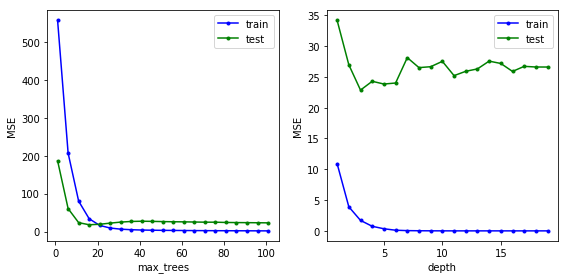

In [21]:
"""Plot both dependencies"""
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(max_trees, train_score_maxtrees, marker='.', c='b', label='train')
ax[0].plot(max_trees, test_score_maxtrees, marker='.', c='g', label='test')
ax[0].set(xlabel='max_trees', ylabel='MSE')
ax[0].legend(loc='upper right')

ax[1].plot(depth, train_score_depth, marker='.', c='b', label='train')
ax[1].plot(depth, test_score_depth, marker='.', c='g', label='test')
ax[1].set(xlabel='depth', ylabel='MSE')
ax[1].legend(loc='upper right')

fig.tight_layout();

In [22]:
answer4 = '2 3'
print('Task 4. Answer:', answer4)
write_answer(4, answer4)

Task 4. Answer: 2 3


## Task 5. Linear regression

In [23]:
from sklearn import linear_model

In [24]:
"""Definition and fitting linear regressor"""
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

answer5 = metrics.mean_squared_error(
    y_test, lin_regr.predict(X_test))

In [25]:
print('Task 5. Answer:', answer5**0.5)
write_answer(5, answer5**0.5)

Task 5. Answer: 8.270468034938196
